In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier  # Example model


In [2]:
# read csv
df = pd.read_csv('./resources/mxmh_survey_results.csv')
df.head()


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## Data discovery

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [4]:
# drop unhelpful columns
cols_to_drop = [
    'BPM',
    'Permissions',
    # 'Timestamp'
    ]

cleaned_df = df.drop(columns=cols_to_drop)

In [5]:
cleaned_df = cleaned_df.dropna()
cleaned_df.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [6]:
print(f'{len(df)-len(cleaned_df)} rows dropped ({len(cleaned_df)} remaining)')

18 rows dropped (718 remaining)


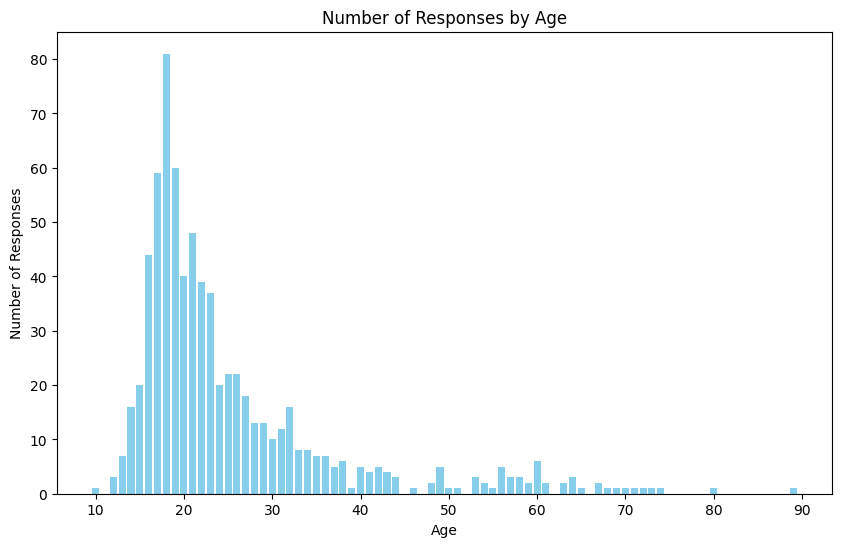

In [7]:
# responses by age
age_counts = cleaned_df['Age'].value_counts()
age_counts

plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Responses')
plt.title('Number of Responses by Age')
plt.xticks(rotation=0)
plt.show()

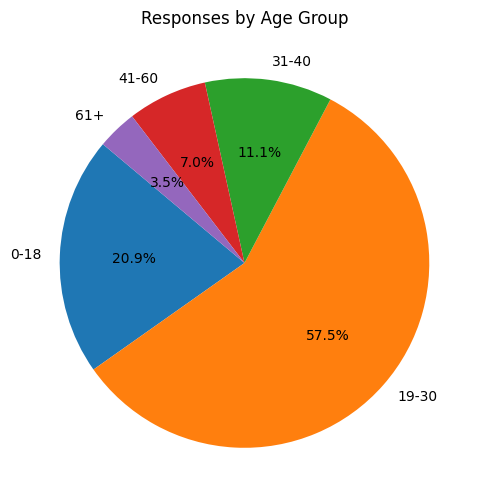

In [8]:
bins =   [0, 18, 30, 40, 60, 90]
labels = ['0-18', '19-30', '31-40', '41-60', '61+']
cleaned_df['AgeGroup'] = pd.cut(cleaned_df['Age'], bins=bins, labels=labels, right=False)

# Step 3: Aggregation
age_group_counts = cleaned_df['AgeGroup'].value_counts().sort_index()

# Step 4: Plotting
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Responses by Age Group')
plt.show()

## II. Preprocessing

In [9]:
cleaned_df = cleaned_df.drop(columns='AgeGroup')
cleaned_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [10]:
# making yes/no columns binary
columns_for_conversion = ['Instrumentalist', 'Composer']

for col in columns_for_conversion:
    cleaned_df[col] = cleaned_df[col].map({
        'Yes': 1,
        'No' : 0
        })

In [12]:
df_encoded = pd.get_dummies(cleaned_df, columns=[
    'Primary streaming service',
    'While working',
    'Fav genre'
    ])

df_encoded.head()

,Timestamp,Age,Hours per day,Instrumentalist,Composer,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],...,Fav genre_Jazz,Fav genre_K pop,Fav genre_Latin,Fav genre_Lofi,Fav genre_Metal,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music
2,8/27/2022 21:28:18,18.0,4.0,0,0,No,Yes,Never,Never,Very frequently,...,False,False,False,False,False,False,False,False,False,True
3,8/27/2022 21:40:40,61.0,2.5,0,1,Yes,Yes,Sometimes,Never,Never,...,True,False,False,False,False,False,False,False,False,False
4,8/27/2022 21:54:47,18.0,4.0,0,0,Yes,No,Never,Never,Rarely,...,False,False,False,False,False,False,True,False,False,False
5,8/27/2022 21:56:50,18.0,5.0,1,1,Yes,Yes,Rarely,Sometimes,Never,...,True,False,False,False,False,False,False,False,False,False
6,8/27/2022 22:00:29,18.0,3.0,1,0,Yes,Yes,Sometimes,Never,Rarely,...,False,False,False,False,False,False,False,False,False,True


In [13]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 2 to 735
Data columns (total 52 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Timestamp                                                    718 non-null    object 
 1   Age                                                          718 non-null    float64
 2   Hours per day                                                718 non-null    float64
 3   Instrumentalist                                              718 non-null    int64  
 4   Composer                                                     718 non-null    int64  
 5   Exploratory                                                  718 non-null    object 
 6   Foreign languages                                            718 non-null    object 
 7   Frequency [Classical]                                        718 non-null    object 


In [ ]:
# put target columns back at end for legibility

In [9]:
# define target and feature data
target_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']

y = cleaned_df[target_columns]
X = cleaned_df.drop(columns=target_columns, axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print(f"Training features shape: {X_train.shape}")
print(f"Training targets shape: {y_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Testing targets shape: {y_test.shape}")


Training features shape: (582, 26)
Training targets shape: (582, 5)
Testing features shape: (146, 26)
Testing targets shape: (146, 5)
